In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

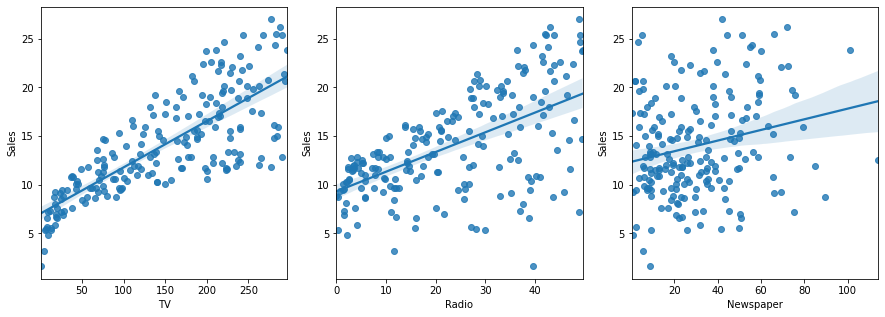

In [7]:
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1,3,3)
sns.regplot(ax=ax1,x='TV', y='Sales',data=df)
sns.regplot(ax=ax2,x='Radio', y='Sales',data=df)
sns.regplot(ax=ax3,x='Newspaper', y='Sales',data=df)

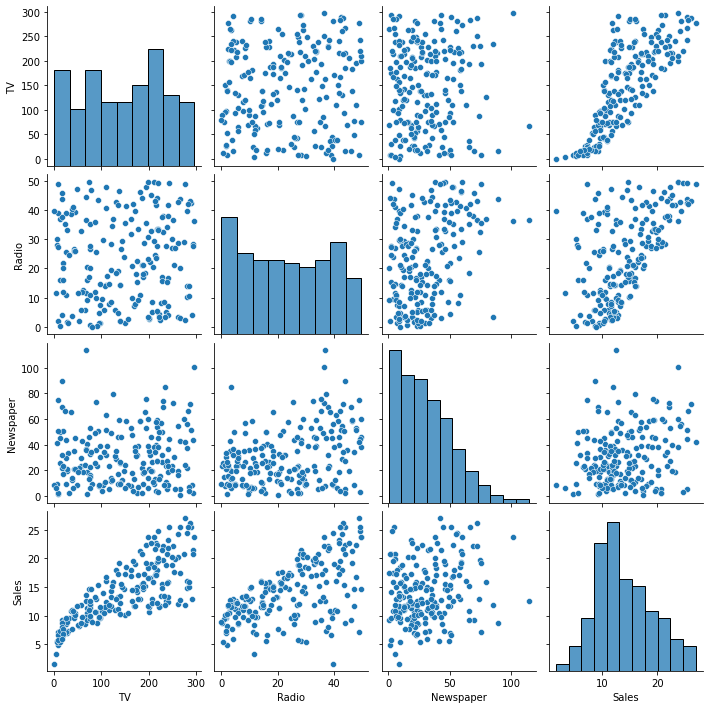

In [8]:
sns.pairplot(df)

<AxesSubplot:>

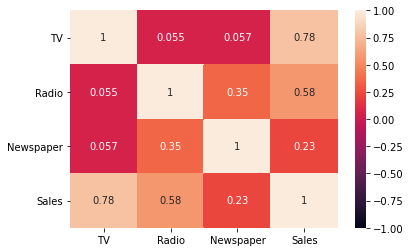

In [9]:
corr=df.corr()
sns.heatmap(df.corr(),xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1, annot=True)

In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [13]:
X=df.drop('Sales',axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X,y)

LinearRegression()

ß1 degerleri coef_


In [17]:
lm.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [18]:
# print the intercept ß0
print(lm.intercept_)

2.9388893694594085


In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


In [20]:
predictions = lm.predict(X)

In [21]:
comp=pd.DataFrame({'Actual':y, 'Predicted' :predictions})
comp

,Actual,Predicted
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672
...,...,...
195,7.6,5.370342
196,9.7,8.165312
197,12.8,12.785921
198,25.5,23.767321


#Hatalarin ortalamasinin sifir oldugunu söyler Asagidaki

<AxesSubplot:xlabel='Sales', ylabel='Count'>

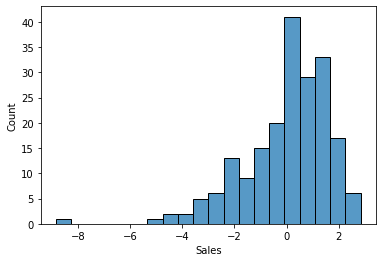

In [22]:
sns.histplot((y-predictions),bins=20)

In [23]:
#Simdide Asagida Modelimizin Performansina bakalim

In [24]:
lm.score(X,y)

0.8972106381789522

# We can use statsmodel library to produce p-values
# ----------------------------------------------------------------------------------------

In [25]:
import statsmodels.api as sm

In [26]:
X2 = sm.add_constant(X)

C:\Users\taner\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 14 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        14:01:08   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

# ----------------------------------------------------------------------------------

In [28]:
# Let's continue with sklearn
predictions = lm.predict(X)
predictions

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [29]:
comp=pd.DataFrame({'Actual':y, 'Predicted':predictions})
comp

,Actual,Predicted
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672
...,...,...
195,7.6,5.370342
196,9.7,8.165312
197,12.8,12.785921
198,25.5,23.767321


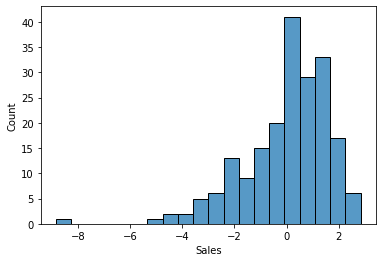

In [30]:
sns.histplot((y-predictions),bins=20);

# Model's $R^2$

In [31]:
lm.score(X,y)

0.8972106381789522

In [32]:
from sklearn import metrics

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


All of these are **loss functions**, because we want to minimize them.

In [33]:
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 1.252011229687068
MSE: 2.784126314510936
RMSE: 1.6685701407225697


# What we have done so far is completely wrong since we did not split the model into training and test set (Modeli eğitim ve test seti olarak ayırmadığımız için şimdiye kadar yaptıklarımız tamamen yanlış.)

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model. 

(Şimdi verileri bir eğitim seti ve bir test seti olarak ayıralım. Modeli eğitim setinde eğiteceğiz ve ardından modeli değerlendirmek için test setini kullanacağız.)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [36]:
X_test

,TV,Radio,Newspaper
0,230.1,37.8,69.2
146,240.1,7.3,8.7
158,11.7,36.9,45.2
176,248.4,30.2,20.3
197,177.0,9.3,6.4
82,75.3,20.3,32.5
75,16.9,43.7,89.4
85,193.2,18.4,65.7
80,76.4,26.7,22.3
157,149.8,1.3,24.3


In [37]:
X_train

,TV,Radio,Newspaper
9,199.8,2.6,21.2
19,147.3,23.9,19.1
199,232.1,8.6,8.7
152,197.6,23.3,14.2
3,151.5,41.3,58.5
...,...,...,...
57,136.2,19.2,16.6
150,280.7,13.9,37.0
134,36.9,38.6,65.6
143,104.6,5.7,34.4


In [38]:
y_train

9      10.6
19     14.6
199    13.4
152    16.6
3      18.5
       ... 
57     13.2
150    16.1
134    10.8
143    10.4
111    21.8
Name: Sales, Length: 160, dtype: float64

In [39]:
y_test

0      22.1
146    13.2
158     7.3
176    20.2
197    12.8
82     11.3
75      8.7
85     15.2
80     11.8
157    10.1
71     12.4
95     16.9
138     9.6
109    19.8
147    25.4
192     5.9
126     6.6
16     12.5
87     16.0
103    14.7
177    11.7
127     8.8
11     17.4
113    15.9
94     11.5
140    10.9
170     8.4
13      9.7
69     22.3
105    19.2
81     12.3
130     1.6
160    14.4
54     20.2
37     14.7
132     5.7
64     18.0
151    11.6
51     10.7
153    19.0
Name: Sales, dtype: float64

## Creating and Training the Model

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

Intercept ise ß0 dir

In [ ]:
lm.intercept_

coef_ = ß1,ß2,ß3 demek. cünku 3 degisken var stunda

In [ ]:
lm.coef_

In [ ]:
# Model's performance on the test set
lm.score(X_test,y_test)

In [ ]:
predictions = lm.predict(X_test)
predictions

In [ ]:
list(zip(y_test,predictions))

In [ ]:
list(zip(X_test,predictions))

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Credit Data Set

In [40]:
df = pd.read_csv('Credit_Data.csv')
df

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [42]:
dummies = pd.get_dummies(df[['Gender', 'Student', 'Married','Ethnicity']])

In [43]:
dummies

,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,1,0,1,0
2,0,1,1,0,1,0,0,1,0
3,1,0,1,0,1,0,0,1,0
4,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
395,0,1,1,0,0,1,0,0,1
396,0,1,1,0,1,0,1,0,0
397,1,0,1,0,0,1,0,0,1
398,0,1,1,0,0,1,0,0,1


In [44]:
y = df.Balance

# Drop the column with the independent variable (Balance), and columns for which we created dummy variables
X_ = df.drop(['ID','Gender', 'Student', 'Married','Ethnicity','Balance'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['Gender_Male', 'Student_Yes', 'Married_Yes','Ethnicity_African American','Ethnicity_Asian']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      400 non-null    float64
 1   Limit                       400 non-null    float64
 2   Rating                      400 non-null    float64
 3   Cards                       400 non-null    float64
 4   Age                         400 non-null    float64
 5   Education                   400 non-null    float64
 6   Gender_Male                 400 non-null    uint8  
 7   Student_Yes                 400 non-null    uint8  
 8   Married_Yes                 400 non-null    uint8  
 9   Ethnicity_African American  400 non-null    uint8  
 10  Ethnicity_Asian             400 non-null    uint8  
dtypes: float64(6), uint8(5)
memory usage: 20.8 KB


In [45]:
X

,Income,Limit,Rating,Cards,Age,Education,Gender_Male,Student_Yes,Married_Yes,Ethnicity_African American,Ethnicity_Asian
0,14.891,3606.0,283.0,2.0,34.0,11.0,1,0,1,0,0
1,106.025,6645.0,483.0,3.0,82.0,15.0,0,1,1,0,1
2,104.593,7075.0,514.0,4.0,71.0,11.0,1,0,0,0,1
3,148.924,9504.0,681.0,3.0,36.0,11.0,0,0,0,0,1
4,55.882,4897.0,357.0,2.0,68.0,16.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100.0,307.0,3.0,32.0,13.0,1,0,1,0,0
396,13.364,3838.0,296.0,5.0,65.0,17.0,1,0,0,1,0
397,57.872,4171.0,321.0,5.0,67.0,12.0,0,0,1,0,0
398,37.728,2525.0,192.0,1.0,44.0,13.0,1,0,1,0,0


In [46]:
y

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [47]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
# Model's performance on the test set
lm.score(X_test,y_test)

0.8266375240641092

In [49]:
predictions = lm.predict(X_test)
predictions

array([20.50029784, 15.0222705 , 10.80813551, 19.89058115, 12.66008412,
       10.3342574 , 12.2970996 , 15.05686774, 11.66663932,  9.8546121 ,
       10.65974828, 16.38146313, 10.04997546, 19.57237277, 23.33430011,
        4.59060526, 11.02266616, 13.07536724, 15.83897   , 14.67725415,
       12.01197015,  6.57958304, 17.2205124 , 16.31263748, 10.53437718,
        9.63549659,  7.53354059,  8.84287262, 21.20268962, 18.18388355,
       14.32373388, 10.9287944 , 14.15712722, 20.24798308, 16.03560879,
        8.82701373, 17.23102665,  9.95182437,  9.37190041, 18.36127123])

In [50]:
y_test

0      22.1
146    13.2
158     7.3
176    20.2
197    12.8
82     11.3
75      8.7
85     15.2
80     11.8
157    10.1
71     12.4
95     16.9
138     9.6
109    19.8
147    25.4
192     5.9
126     6.6
16     12.5
87     16.0
103    14.7
177    11.7
127     8.8
11     17.4
113    15.9
94     11.5
140    10.9
170     8.4
13      9.7
69     22.3
105    19.2
81     12.3
130     1.6
160    14.4
54     20.2
37     14.7
132     5.7
64     18.0
151    11.6
51     10.7
153    19.0
Name: Sales, dtype: float64

In [51]:
predictions

array([20.50029784, 15.0222705 , 10.80813551, 19.89058115, 12.66008412,
       10.3342574 , 12.2970996 , 15.05686774, 11.66663932,  9.8546121 ,
       10.65974828, 16.38146313, 10.04997546, 19.57237277, 23.33430011,
        4.59060526, 11.02266616, 13.07536724, 15.83897   , 14.67725415,
       12.01197015,  6.57958304, 17.2205124 , 16.31263748, 10.53437718,
        9.63549659,  7.53354059,  8.84287262, 21.20268962, 18.18388355,
       14.32373388, 10.9287944 , 14.15712722, 20.24798308, 16.03560879,
        8.82701373, 17.23102665,  9.95182437,  9.37190041, 18.36127123])

In [52]:
comp=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
comp

,Actual,Predicted
0,22.1,20.500298
146,13.2,15.022271
158,7.3,10.808136
176,20.2,19.890581
197,12.8,12.660084
82,11.3,10.334257
75,8.7,12.297100
85,15.2,15.056868
80,11.8,11.666639
157,10.1,9.854612


In [53]:
comp['residuals'] = comp['Actual']-comp['Predicted']
comp

,Actual,Predicted,residuals
0,22.1,20.500298,1.599702
146,13.2,15.022271,-1.822271
158,7.3,10.808136,-3.508136
176,20.2,19.890581,0.309419
197,12.8,12.660084,0.139916
82,11.3,10.334257,0.965743
75,8.7,12.297100,-3.597100
85,15.2,15.056868,0.143132
80,11.8,11.666639,0.133361
157,10.1,9.854612,0.245388


<AxesSubplot:xlabel='residuals', ylabel='Count'>

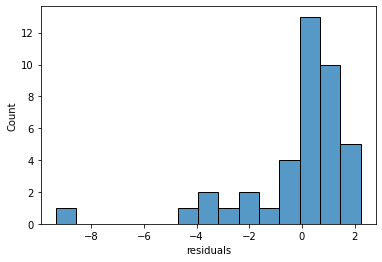

In [54]:
sns.histplot(comp['residuals'])

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.3409774291262115
MSE: 4.535785391880799
RMSE: 2.1297383388296316


In [56]:
auto = pd.read_csv('Auto.csv')
#check data has been read in properly
auto=auto.sort_values(by='horsepower')
auto

,mpg,horsepower
19,26.0,46
101,26.0,46
324,43.4,48
323,44.3,48
242,43.1,48
...,...,...
6,14.0,220
8,14.0,225
94,12.0,225
13,14.0,225


In [57]:
y=np.array(auto['mpg'])
x=np.array(auto['horsepower']).reshape(-1,1)

In [58]:
x

array([[ 46],
       [ 46],
       [ 48],
       [ 48],
       [ 48],
       [ 49],
       [ 52],
       [ 52],
       [ 52],
       [ 52],
       [ 53],
       [ 53],
       [ 54],
       [ 58],
       [ 58],
       [ 60],
       [ 60],
       [ 60],
       [ 60],
       [ 60],
       [ 61],
       [ 62],
       [ 62],
       [ 63],
       [ 63],
       [ 63],
       [ 64],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 66],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 67],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 69],
       [ 69],
       [ 69],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
       [ 70],
      

In [59]:
y

array([26. , 26. , 43.4, 44.3, 43.1, 29. , 29. , 32.8, 44. , 31. , 33. ,
       33. , 23. , 36. , 39.1, 35.1, 27. , 36.1, 38.1, 24.5, 32. , 29.8,
       37.7, 38. , 34.7, 30.5, 39. , 37.2, 34.1, 37. , 34.4, 40.8, 29.9,
       31. , 32. , 31.8, 46.6, 36.1, 30. , 31. , 31. , 38. , 32. , 38. ,
       26. , 36.4, 32.3, 33.8, 44.6, 30. , 34.1, 37. , 31. , 29.5, 31.5,
       30. , 26. , 35. , 37.3, 29. , 33.5, 39.4, 32. , 29. , 32.1, 34. ,
       36. , 34.5, 30. , 34.2, 26. , 25. , 29.5, 31.9, 31.5, 27.2, 15. ,
       15. , 22. , 26.5, 32.4, 21. , 36. , 31.6, 33. , 25. , 32.4, 33.7,
       26. , 32.2, 31.3, 30.9, 28. , 28. , 24. , 26. , 36. , 24. , 29. ,
       30. , 30.7, 41.5, 22. , 25.4, 18. , 34.3, 30.5, 23. , 26. , 29. ,
       28. , 26. , 27.4, 26. , 25. , 28. , 35.7, 28.1, 30. , 24. , 25. ,
       31. , 33.5, 29. , 27. , 23. , 29. , 36. , 26.6, 30. , 32. , 27.2,
       17.6, 20.2, 21. , 23.8, 19.8, 31. , 38. , 20.8, 19. , 22. , 28. ,
       21. , 27. , 23. , 25. , 21. , 26.4, 18. , 19

In [61]:
#Fit a linear regression Model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

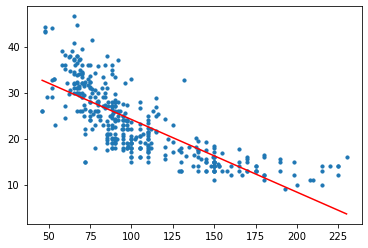

In [62]:
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [63]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[1.0000e+00, 4.6000e+01, 2.1160e+03],
       [1.0000e+00, 4.6000e+01, 2.1160e+03],
       [1.0000e+00, 4.8000e+01, 2.3040e+03],
       ...,
       [1.0000e+00, 2.2500e+02, 5.0625e+04],
       [1.0000e+00, 2.2500e+02, 5.0625e+04],
       [1.0000e+00, 2.3000e+02, 5.2900e+04]])

In [64]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)

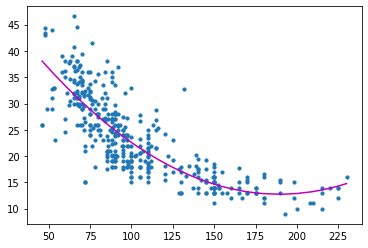

In [65]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
x_poly

In [ ]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)

In [ ]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [ ]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)
x_poly

In [ ]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(r2)

In [ ]:
polynomial_features= PolynomialFeatures(degree=4)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)

In [ ]:
X_poly_test


In [ ]:
X_poly_train

In [ ]:
polymodel = LinearRegression()
polymodel.fit(X_poly_train, y_train)
y_poly_pred = polymodel.predict(X_poly_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_poly_pred)
r2 = r2_score(y_test,y_poly_pred)
print(mse)
print(r2)